In [1]:
import numpy as np
import matplotlib.pyplot as plt
import simtk.unit as unit

kB = unit.BOLTZMANN_CONSTANT_kB* unit.AVOGADRO_CONSTANT_NA

### Doble pozo unidimensional

Definimos el potencial:

In [2]:
def potential_energy (x):
    
    ''' V(x) = Eo(Cx^4-x^2)+mx '''
    
    Eo = 6.0 * unit.kilocalorie/(unit.mole * unit.nanometers**2)    # Factor de escala energía
    C  = 0.5 * 1.0/unit.nanometers**2   # Factor de apertura de brazos
    M  = -0.25 * unit.kilocalorie/(unit.mole * unit.nanometers) # Factor de asimetricidad

    return Eo*(C*x**4-x**2)+M*x

Definimos el peso de un punto, la función densidad de peso:

In [3]:
def densidad (U, temperature, x):
    return np.exp(-U(x)/(kB * temperature))

Definimos antes del peso de una región, el método de integración numérica:

In [4]:
def integral (function, limite_inferior, limite_superior, num_bins):
    
    ''' Integral numérica de cualquier función entre los limites inferior y superior'''
    
    x_series = np.linspace(limite_inferior, limite_superior, num_bins+1, endpoint=True)
    delta_x = x_series[1]-x_series[0]
    
    area = 0.0
    for x in x_series[:-1]:
        y = function(x*unit.nanometers)
        area_rectangulo = y*delta_x
        area = area + area_rectangulo
    
    return area

Definimos el peso de una región:

In [13]:
def peso (U, temperature, limite_inferior, limite_superior, num_bins):
    
    x_series = np.linspace(limite_inferior, limite_superior, num_bins+1, endpoint=True)
    delta_x = x_series[1]-x_series[0]
    
    area = 0.0
    for x in x_series[:-1]:
        y = np.exp(-U(x * unit.nanometers)/(kB * temperature))
        area_rectangulo = y*delta_x
        area = area + area_rectangulo
    
    return area

Veamos primero el potencial en la región (-2.0, 2.0)

In [6]:
x_series = np.linspace(-2.0, 2.0, 100, endpoint=True) * unit.nanometers

In [7]:
potential_series = potential_energy(x_series)

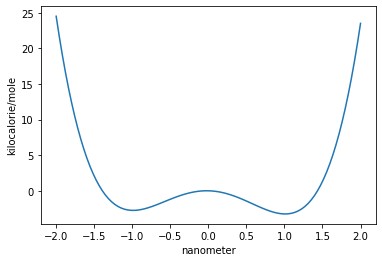

In [8]:
plt.plot(x_series, potential_series)
plt.xlabel(x_series.unit)
plt.ylabel(potential_series.unit)
plt.show()

In [10]:
densidad_series = densidad(potential_energy, 300*unit.kelvin, x_series)

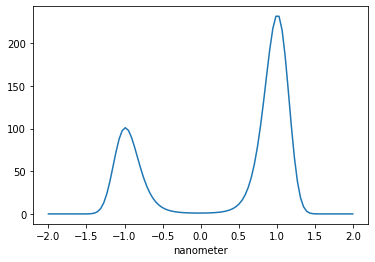

In [11]:
plt.plot(x_series, densidad_series)
plt.xlabel(x_series.unit)
plt.show()

In [32]:
Peso_Off = peso (potential_energy, 100*unit.kelvin, 0, 5.0, 5000 )
Peso_On = peso (potential_energy, 100*unit.kelvin, -5.0, 0.0, 5000 )
Peso_Total = peso (potential_energy, 100*unit.kelvin, -5.0, 5.0, 10000 )

In [33]:
print("Peso_Off:", Peso_Off)
print("Peso_On:", Peso_On)
print("Peso_Total:", Peso_Total)

Peso_Off: 2899971.559243961
Peso_On: 242257.41506120548
Peso_Total: 3142228.9743061326


In [34]:
Probabilidad_Off = Peso_Off/Peso_Total
Probabilidad_On = Peso_On/Peso_Total

In [35]:
print("Probabilidad_Off:", Probabilidad_Off)
print("Probabilidad_On:", Probabilidad_On)

Probabilidad_Off: 0.9229026856275911
Probabilidad_On: 0.07709731437210135


$K_a = \frac{P_{on}}{P_{off}}$

In [36]:
Ka = Probabilidad_On / Probabilidad_Off

In [37]:
print("Ka:", Ka)

Ka: 0.08353785894519716
